In [28]:
import kagglehub
print("Downloading dataset...")
path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")

# Load the dataset from the downloaded path
file_path = f'/kaggle/input/heart_disease_uci.csv'

Using Colab cache for faster access to the 'heart-disease-data' dataset.


In [101]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import figure
import seaborn as sns
import numpy as np

In [27]:
df = pd.read_csv("/kaggle/input/heart-disease-data/heart_disease_uci.csv")

print(f"Data shape: {df.shape}")
df.head()

Data shape: (920, 16)


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [30]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None
               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  

In [34]:
print(df.isnull().sum().value_counts)

<bound method IndexOpsMixin.value_counts of id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64>


**Analysing Target Variables**

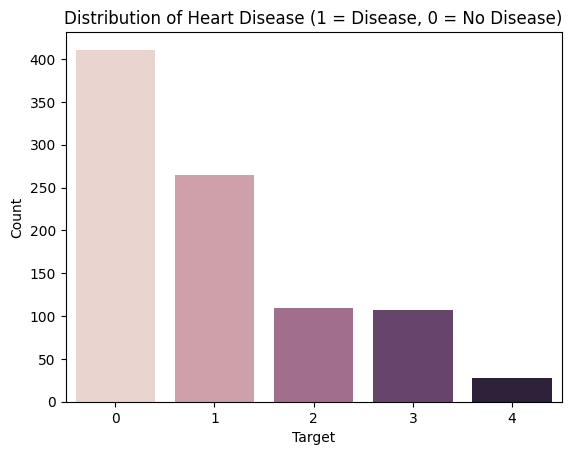

In [58]:
figure.Figure(figsize=(8, 6))
sns.countplot(x="num", data=df, hue="num", legend=False)
plt.title('Distribution of Heart Disease (1 = Disease, 0 = No Disease)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

Observation: The dataset is fairly balanced, with a slightly higher number of patients having heart disease.

<Axes: xlabel='sex', ylabel='count'>

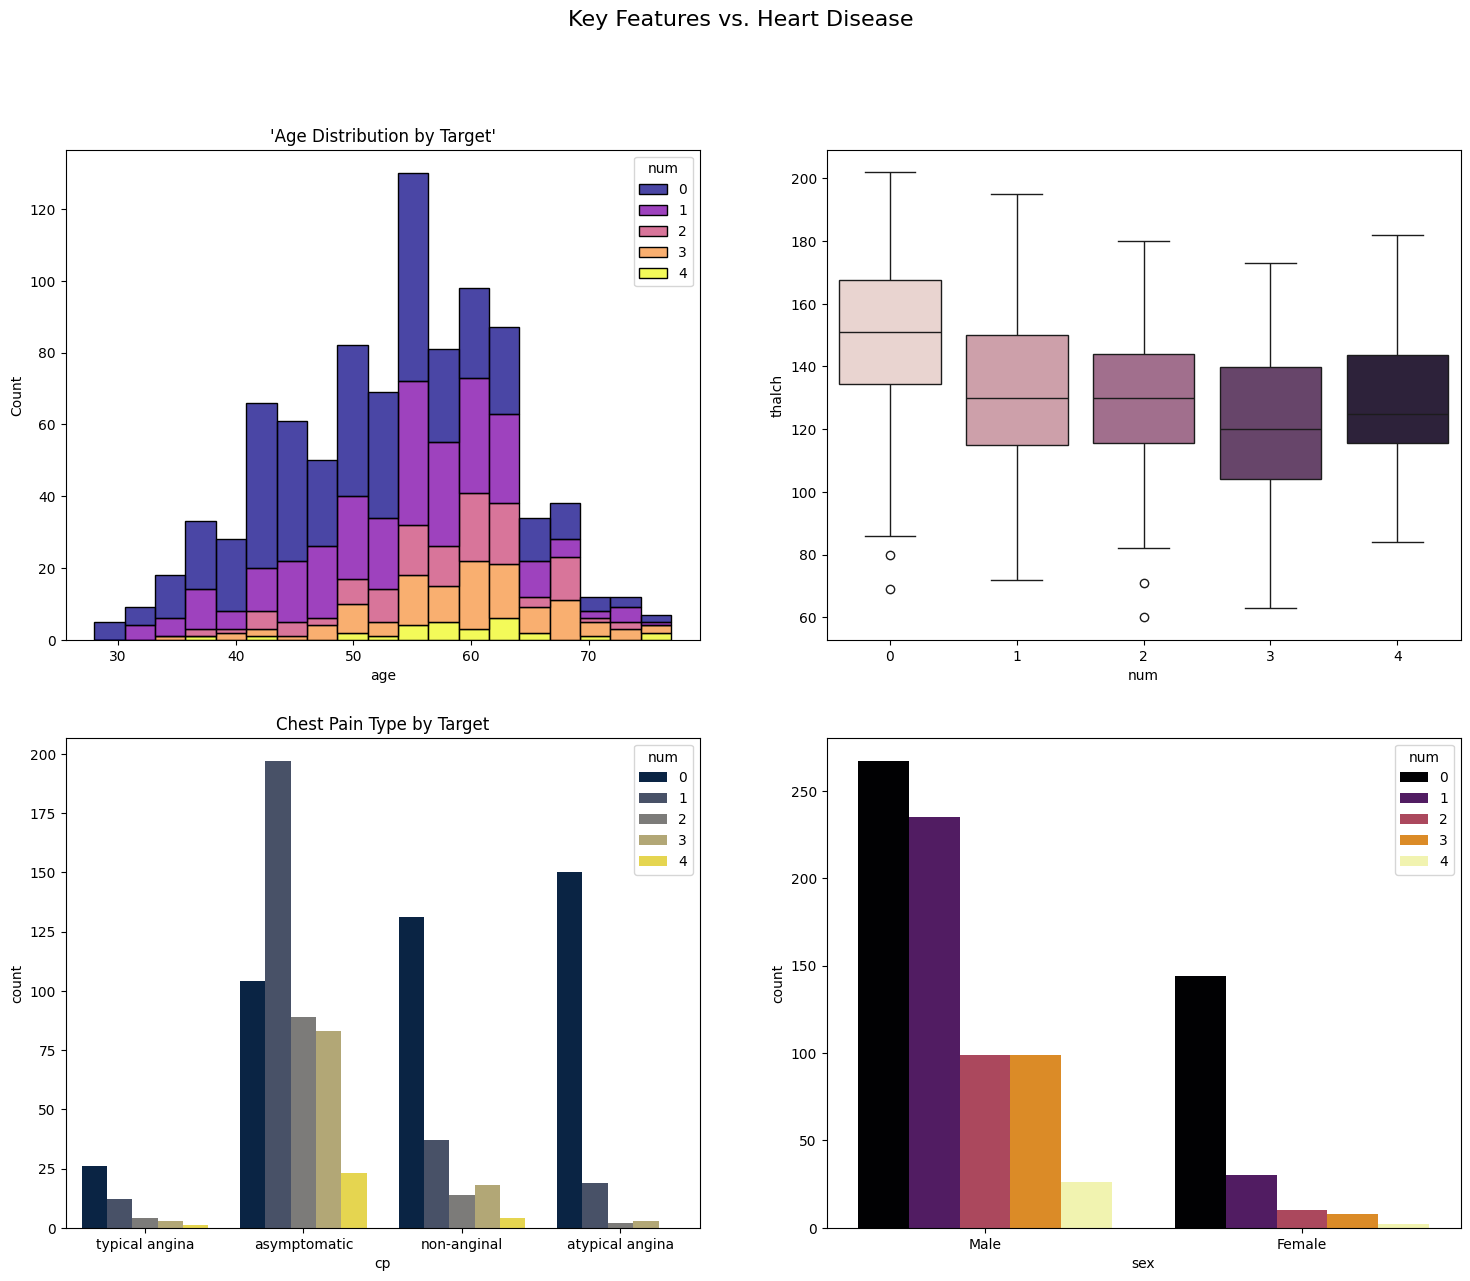

In [97]:
fig,axes=plt.subplots(2,2,figsize=(18,14))
fig.suptitle('Key Features vs. Heart Disease', fontsize=16)

sns.histplot(ax=axes[0,0],x="age", hue="num",data=df,multiple="stack", palette="plasma").set_title("'Age Distribution by Target'")
sns.boxplot(ax=axes[0,1], x="num",y="thalch", hue="num", data=df, legend=False)

cpplot=sns.countplot(ax=axes[1,0], x="cp", hue="num", data=df, palette="cividis").set_title("Chest Pain Type by Target")

sns.countplot(ax=axes[1,1], x="sex", data=df, hue="num", palette="inferno")

thalach: Patients with heart disease tend to have a lower maximum heart rate.

cp: Patients with chest pain types 1 and 2 are more likely to have heart disease.

Sex: A higher proportion of females in this dataset have heart disease compared to males.

<Axes: >

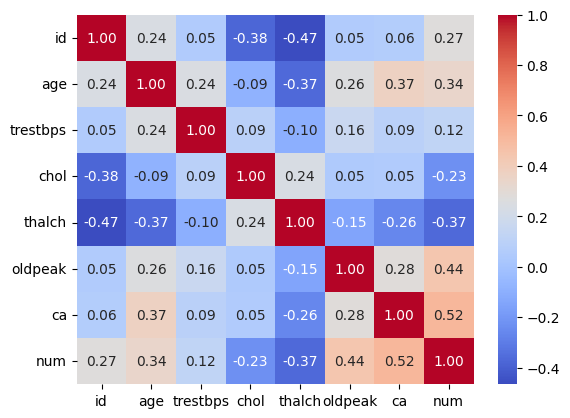

In [111]:
figure.Figure(figsize=(18,15))
numerical_values=df.select_dtypes(include=np.number)

sns.heatmap(numerical_values.corr(),cmap="coolwarm", annot=True,fmt='.2f')

In [114]:
X = df.drop(['num','id', 'dataset'], axis=1)
y = df['num']

In [115]:
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

In [124]:
for category in categorical_features:
  mode_val=X[category].mode()[0]
  X[category].fillna(mode_val,inplace=True)
print(X[categorical_features].isnull().sum())

sex        0
cp         0
fbs        0
restecg    0
exang      0
slope      0
thal       0
dtype: int64


/tmp/ipython-input-23945865.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[category].fillna(mode_val,inplace=True)
/tmp/ipython-input-23945865.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[category].fillna(mode_val,inplace=True)


In [126]:
for col in numerical_features:
  mean_val=X[col].mean()
  X[col].fillna(mean_val,inplace=True)
print(X[numerical_features].isnull().sum())

age         0
trestbps    0
chol        0
thalch      0
oldpeak     0
ca          0
dtype: int64


/tmp/ipython-input-3624051095.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(mean_val,inplace=True)
